# Descriptive Statistics

In [12]:
import pandas as pd

def dataset_details(dataset_path):
    # Load the dataset into a Pandas DataFrame
    df = pd.read_csv(dataset_path)  # Change the function accordingly if your dataset is in a different format
    
    # Display basic information about the dataset
    print("Dataset shape:", df.shape)
    print("\nColumn names:", df.columns.tolist())
    print("\nData types:\n", df.dtypes)
    print("\nSummary statistics:\n", df.describe())
    print("\nMissing values:\n", df.isnull().sum())

# Specify the path to your dataset file
dataset_path = "IrelandTourismDataSet.csv"  # Change this to the path of your dataset file
dataset_details(dataset_path)


Dataset shape: (1120, 19)

Column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C03622V04362', 'Country', 'C02293V02763', 'Direction', 'UNIT', 'Average Length of Stay', 'Leisure (%)', 'Business (%)', 'Visiting Friends/Relatives (%)', 'Other (%)', 'Air (%)', 'Sea (%)', 'Land (%)', 'VALUE', 'Tourism Revenue (Million EUR)']

Data types:
 STATISTIC                          object
STATISTIC Label                    object
TLIST(A1)                           int64
Year                                int64
C03622V04362                       object
Country                            object
C02293V02763                        int64
Direction                          object
UNIT                               object
Average Length of Stay              int64
Leisure (%)                         int64
Business (%)                        int64
Visiting Friends/Relatives (%)      int64
Other (%)                           int64
Air (%)                             int64
Sea (%)          

# Plot Graphs to Visualize Dataset and Summary Statistics

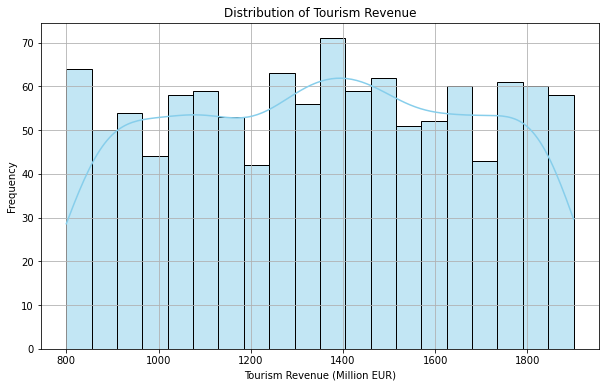

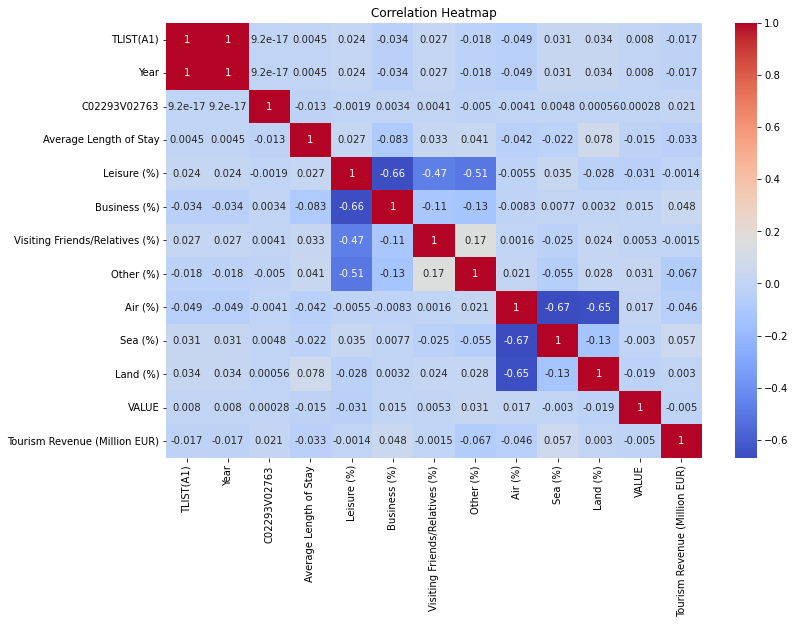

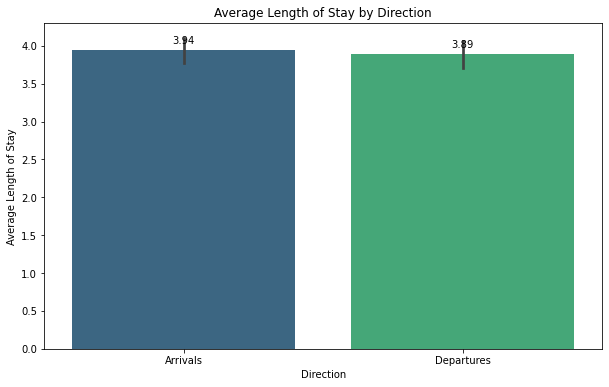

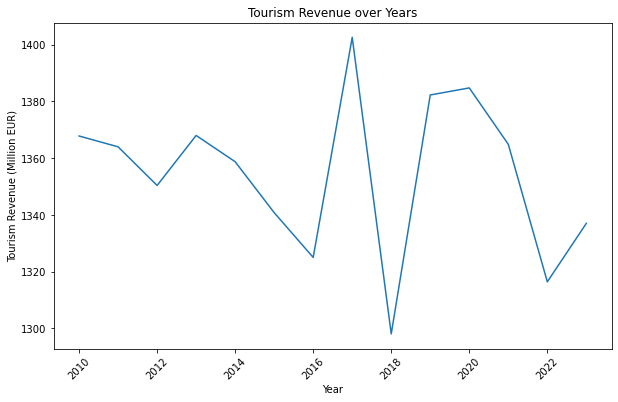

Summary Statistics:
        TLIST(A1)        Year  C02293V02763  Average Length of Stay  \
count  1120.00000  1120.00000   1120.000000             1120.000000   
mean   2016.50000  2016.50000      1.500000                3.916071   
std       4.03293     4.03293      0.500223                2.001811   
min    2010.00000  2010.00000      1.000000                1.000000   
25%    2013.00000  2013.00000      1.000000                2.000000   
50%    2016.50000  2016.50000      1.500000                4.000000   
75%    2020.00000  2020.00000      2.000000                6.000000   
max    2023.00000  2023.00000      2.000000                7.000000   

       Leisure (%)  Business (%)  Visiting Friends/Relatives (%)    Other (%)  \
count  1120.000000   1120.000000                     1120.000000  1120.000000   
mean     49.271429     25.641071                       12.158036    12.929464   
std      27.723960     21.598078                       12.958069    14.717763   
min       2.0000

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("IrelandTourismDataSet.csv")  # Replace "your_dataset.csv" with the actual path to your dataset file

# Descriptive Statistics
summary_stats = df.describe()

# Plot 1: Distribution of Tourism Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df["Tourism Revenue (Million EUR)"], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tourism Revenue')
plt.xlabel('Tourism Revenue (Million EUR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot 3: Bar Plot of Average Length of Stay by Direction
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Direction', y='Average Length of Stay', data=df, palette='viridis')
plt.title('Average Length of Stay by Direction')
plt.xlabel('Direction')
plt.ylabel('Average Length of Stay')

# Adding values over the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# Plot 4: # Line Plot of Tourism Revenue over Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Tourism Revenue (Million EUR)', data=df, ci=None)
plt.title('Tourism Revenue over Years')
plt.xlabel('Year')
plt.ylabel('Tourism Revenue (Million EUR)')
plt.xticks(rotation=45)
plt.show()

# Critical Analysis
# Summary Statistics
print("Summary Statistics:")
print(summary_stats)




# Discrete Distributions

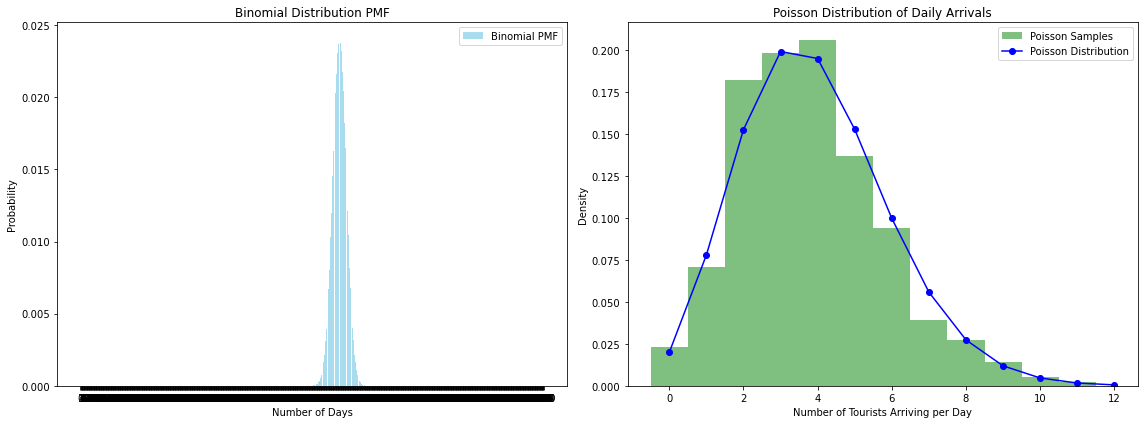

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Selecting 'Average Length of Stay' data
average_length_of_stay = df['Average Length of Stay']

# Fitting Binomial Distribution
n = len(average_length_of_stay)
p = np.mean(average_length_of_stay) / 7  # Assuming 1 week as a trial
binom_rv = binom(n, p)

# Fitting Poisson Distribution
arrival_rate = np.mean(average_length_of_stay)
poisson_rv = poisson(arrival_rate)

# Generating random samples
binomial_samples = binom_rv.rvs(size=1000)
poisson_samples = poisson_rv.rvs(size=1000)

# Plotting
plt.figure(figsize=(16, 6))

# Plotting Binomial Distribution PMF
plt.subplot(1, 2, 1)
x_binomial = np.arange(0, len(average_length_of_stay) + 1)
plt.bar(x_binomial, binom_rv.pmf(x_binomial), color='skyblue', alpha=0.7, label='Binomial PMF')
plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Days')
plt.ylabel('Probability')
plt.xticks(x_binomial)
plt.legend()

# Plotting Poisson Distribution
plt.subplot(1, 2, 2)
x_poisson = np.arange(0, max(poisson_samples) + 1)
plt.hist(poisson_samples, bins=x_poisson - 0.5, density=True, alpha=0.5, color='green', label='Poisson Samples')
plt.plot(x_poisson, poisson_rv.pmf(x_poisson), 'bo-', label='Poisson Distribution')
plt.title('Poisson Distribution of Daily Arrivals')
plt.xlabel('Number of Tourists Arriving per Day')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


#  Normal Distributions

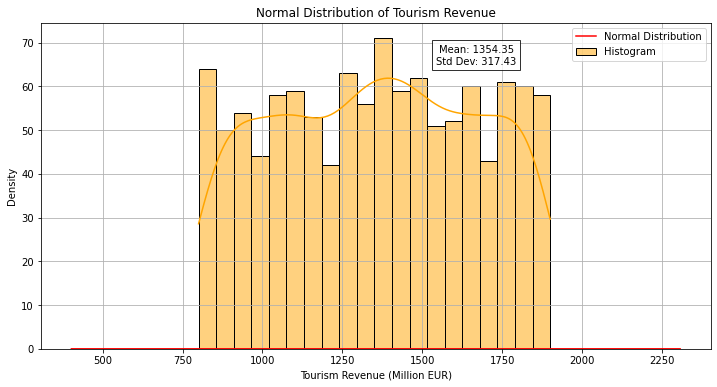

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Selecting 'Tourism Revenue (Million EUR)' data
tourism_revenue = df['Tourism Revenue (Million EUR)']

# Calculate statistics
mean_revenue = np.mean(tourism_revenue)
std_dev_revenue = np.std(tourism_revenue)

# Generate values for the normal distribution
x = np.linspace(mean_revenue - 3*std_dev_revenue, mean_revenue + 3*std_dev_revenue, 100)
normal_distribution = norm.pdf(x, mean_revenue, std_dev_revenue)

# Plotting
plt.figure(figsize=(12, 6))

# Histogram of Tourism Revenue
sns.histplot(tourism_revenue, kde=True, color='orange', label='Histogram', bins=20)

# Plotting Normal Distribution
plt.plot(x, normal_distribution, 'r-', label='Normal Distribution')

# Display statistics
plt.text(0.65, 0.9, f"Mean: {mean_revenue:.2f}\nStd Dev: {std_dev_revenue:.2f}",
         horizontalalignment='center',
         verticalalignment='center',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.title('Normal Distribution of Tourism Revenue')
plt.xlabel('Tourism Revenue (Million EUR)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Summary Statistics

In [16]:
# 1. Summary Statistics
summary_stats = df.describe()
categorical_stats = df.describe(include='object')
categorical_stats

,STATISTIC,STATISTIC Label,C03622V04362,Country,Direction,UNIT
count,1120,1120,1120,1120,1120,1120
unique,1,1,40,40,2,1
top,ASA03,Air and Sea Travel,-,All countries,Arrivals,Thousand
freq,1120,1120,28,28,560,1120


# Data Visualization

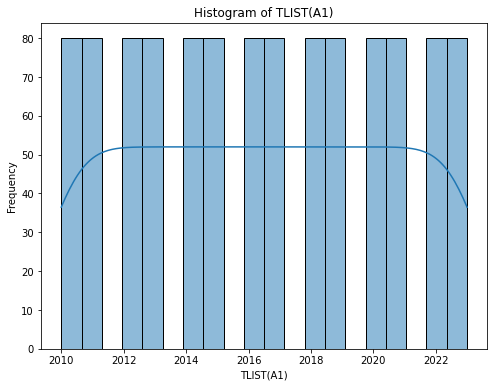

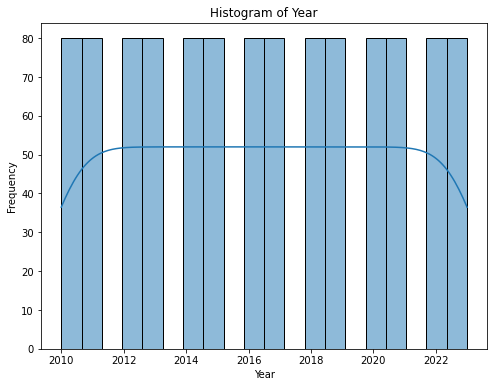

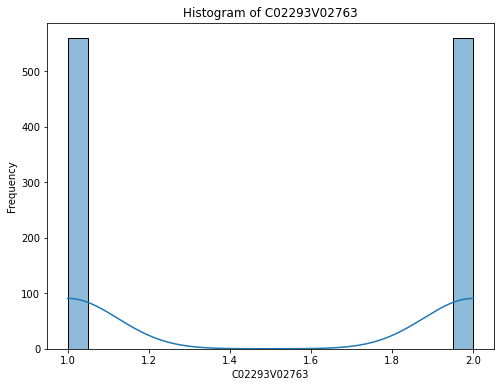

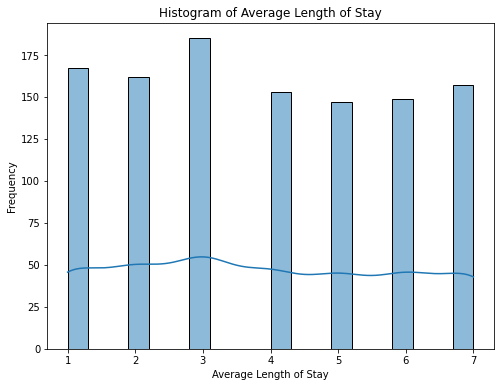

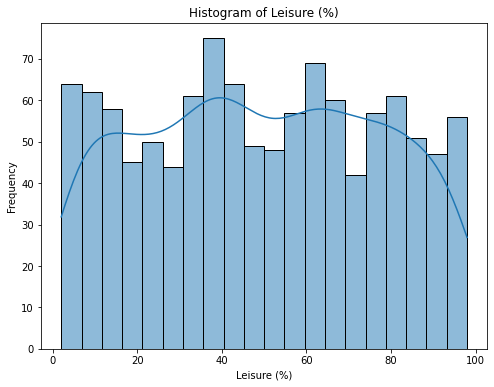

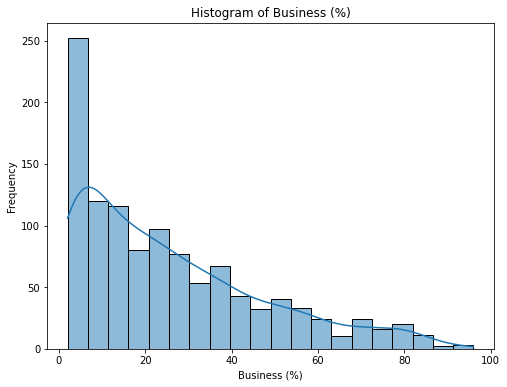

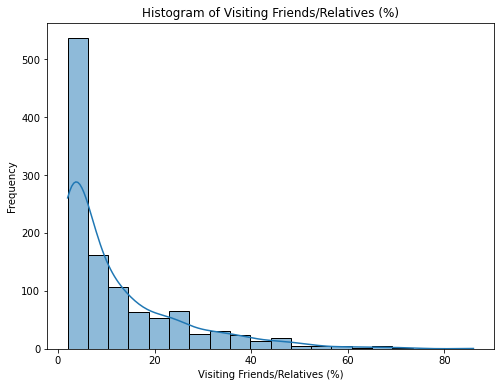

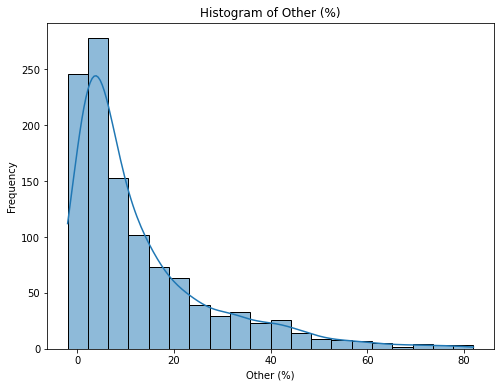

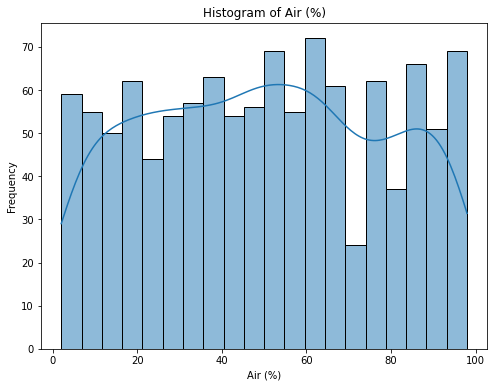

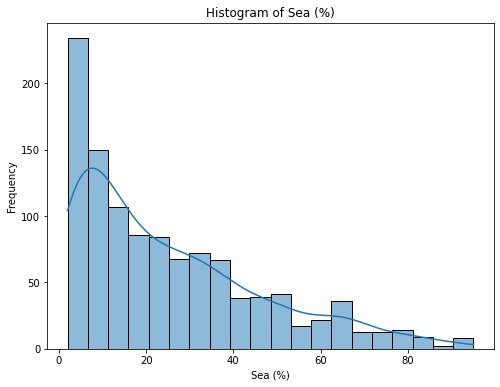

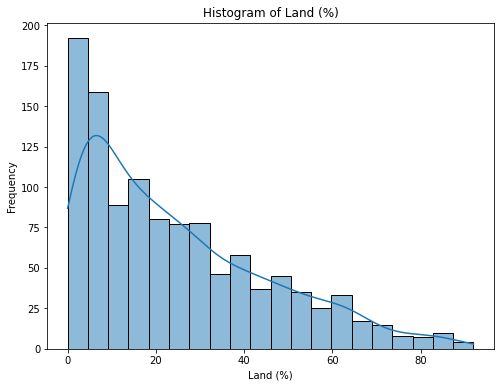

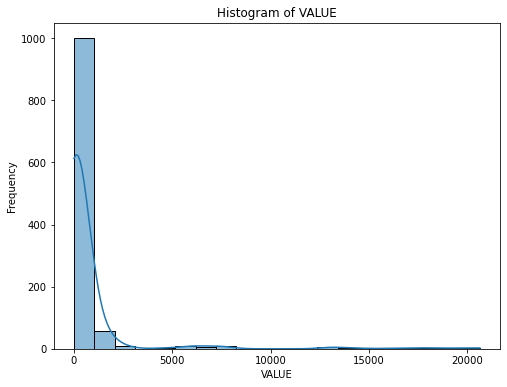

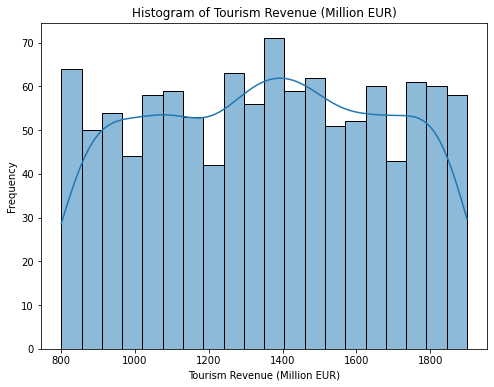

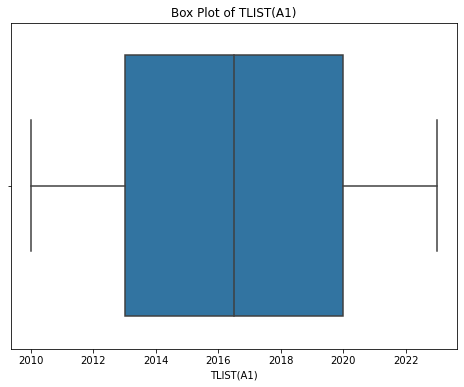

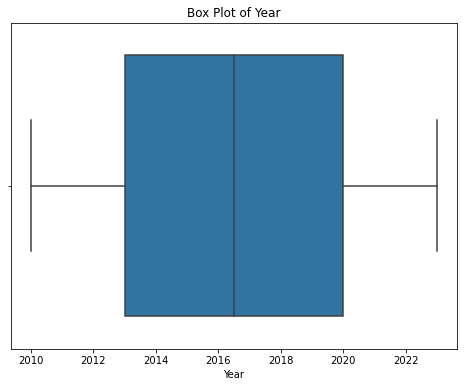

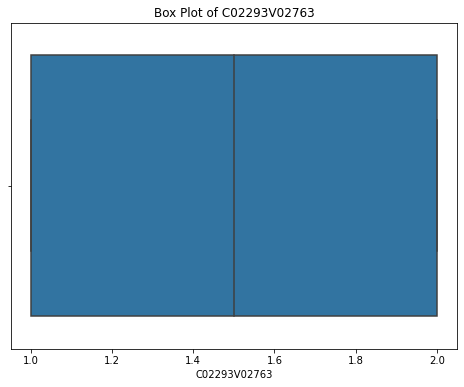

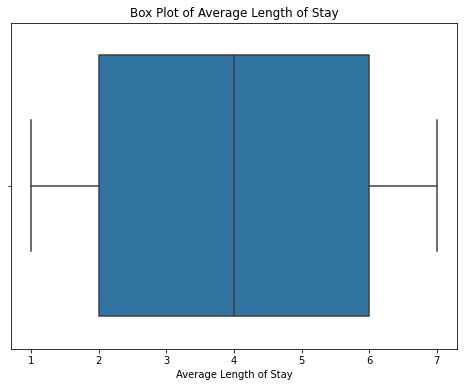

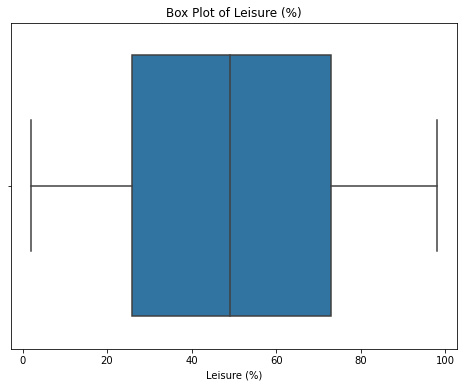

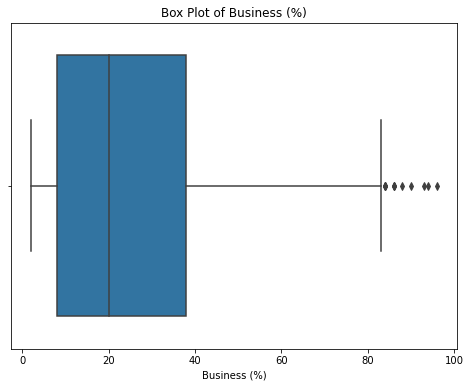

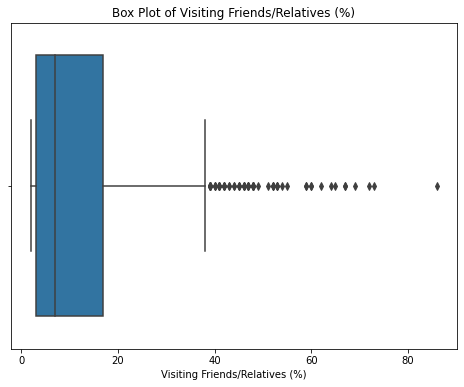

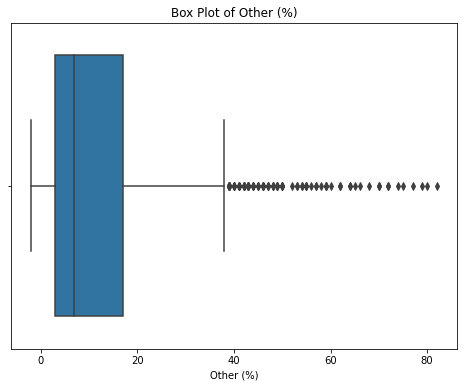

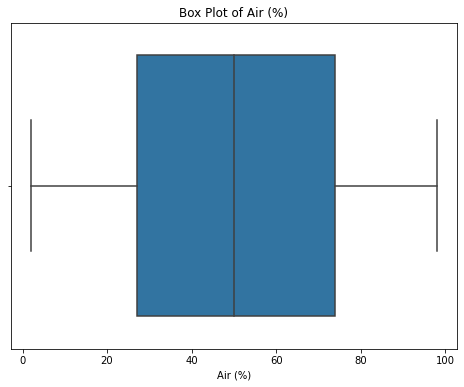

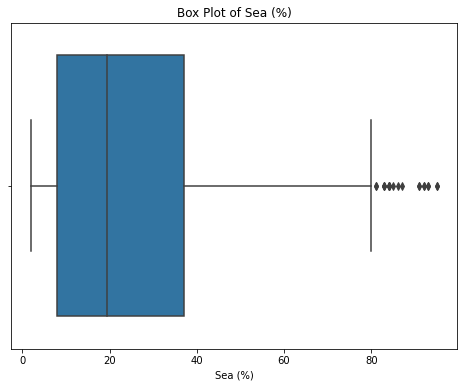

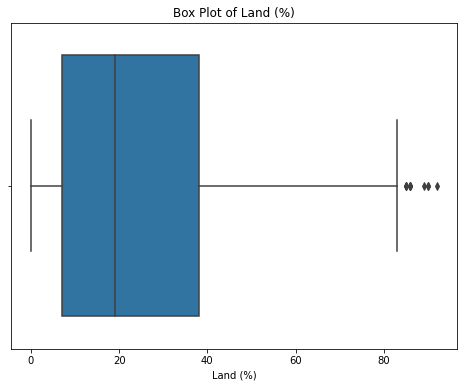

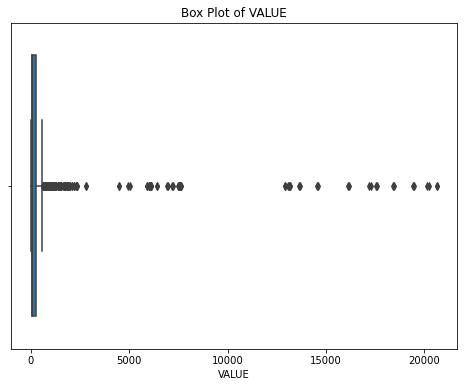

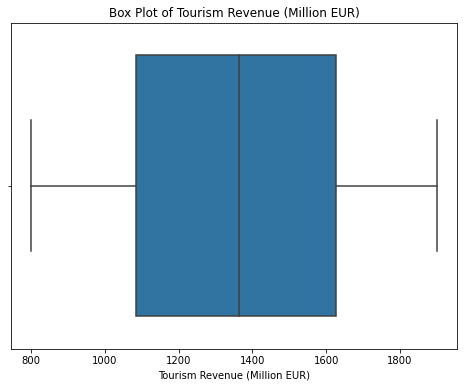

In [17]:
# 2. Data Visualization
# Histograms for numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical variables
for col in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


# Handling Missing Values

In [18]:
# 3. Handling Missing Values
missing_values = df.isnull().sum()
missing_values

STATISTIC                         0
STATISTIC Label                   0
TLIST(A1)                         0
Year                              0
C03622V04362                      0
Country                           0
C02293V02763                      0
Direction                         0
UNIT                              0
Average Length of Stay            0
Leisure (%)                       0
Business (%)                      0
Visiting Friends/Relatives (%)    0
Other (%)                         0
Air (%)                           0
Sea (%)                           0
Land (%)                          0
VALUE                             0
Tourism Revenue (Million EUR)     0
dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values
df = df.dropna()
# Remove rows with '-' values in 'C03622V04362' column
df = df[df['C03622V04362'] != '-']

df.isnull().sum()

STATISTIC                         0
STATISTIC Label                   0
TLIST(A1)                         0
Year                              0
C03622V04362                      0
Country                           0
C02293V02763                      0
Direction                         0
UNIT                              0
Average Length of Stay            0
Leisure (%)                       0
Business (%)                      0
Visiting Friends/Relatives (%)    0
Other (%)                         0
Air (%)                           0
Sea (%)                           0
Land (%)                          0
VALUE                             0
Tourism Revenue (Million EUR)     0
dtype: int64